In [1]:
import numpy as np
from math import sqrt
from pprint import pprint

from sklearn import datasets

from sklearn import preprocessing

from sklearn.dummy import DummyRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error , r2_score

from sklearn.svm import SVR

import matplotlib.pyplot as plt

In [2]:
# Cargar y explorar los datos
datos = datasets.load_diabetes()

pprint(datos)
print(np.shape(datos.data))

{'DESCR': '.. _diabetes_dataset:\n'
          '\n'
          'Diabetes dataset\n'
          '----------------\n'
          '\n'
          'Ten baseline variables, age, sex, body mass index, average blood\n'
          'pressure, and six blood serum measurements were obtained for each '
          'of n =\n'
          '442 diabetes patients, as well as the response of interest, a\n'
          'quantitative measure of disease progression one year after '
          'baseline.\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '  :Number of Instances: 442\n'
          '\n'
          '  :Number of Attributes: First 10 columns are numeric predictive '
          'values\n'
          '\n'
          '  :Target: Column 11 is a quantitative measure of disease '
          'progression one year after baseline\n'
          '\n'
          '  :Attribute Information:\n'
          '      - age     age in years\n'
          '      - sex\n'
          '      - bmi     body

In [3]:
# Extraer la matriz de datos "X" y la variable target "y"
X = datos.data
y = datos.target
print(datos.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [4]:
# Partición EXTERNA: hold-out split 80% train - 20% test.
X_train, X_test, y_train,y_test =train_test_split(datos.data,datos.target,test_size=0.2, random_state=42)

In [5]:
# Estandarización de los datos de entrenamiento y test
standardizer= preprocessing.StandardScaler()

scaler=standardizer.fit(X_train)

X_train=scaler.transform(X_train)
X_test= scaler.transform(X_test)
#print(X_test)

In [6]:
# Métricas de evaluación.
metricas = {
  'MAE': 'neg_mean_absolute_error',
    
  'RMSE': make_scorer(lambda y, y_pred: 
                      sqrt(mean_squared_error(y, y_pred)), 
                      greater_is_better=False),
    
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False)}

In [7]:
# Definimos un algoritmo SVM de regresión
algoritmo = SVR(C=10, gamma='auto', kernel ='rbf')

In [8]:
# Validación y evaluación del modelo.
# en "cv = KFold(n_splits=5)" se hace un cross-validation INTERNO!! 
results = cross_validate(algoritmo, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring = metricas)
print(results)

{'fit_time': array([0.00747585, 0.        , 0.00800395, 0.00460577, 0.        ]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_MAE': array([-48.19465445, -52.08683245, -42.14032046, -45.83818585,
       -50.26385213]), 'test_RMSE': array([-57.5792896 , -60.34473321, -51.87286075, -55.62971345,
       -63.84954959]), 'test_MAPE': array([-32.86189838, -46.03289975, -37.61633112, -43.18731583,
       -44.04644318])}


In [9]:
# Presentación de los resultados de la evaluación.
pprint(results)

{'fit_time': array([0.00747585, 0.        , 0.00800395, 0.00460577, 0.        ]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_MAE': array([-48.19465445, -52.08683245, -42.14032046, -45.83818585,
       -50.26385213]),
 'test_MAPE': array([-32.86189838, -46.03289975, -37.61633112, -43.18731583,
       -44.04644318]),
 'test_RMSE': array([-57.5792896 , -60.34473321, -51.87286075, -55.62971345,
       -63.84954959])}


In [17]:
C=[5,10,25,50,100,200]
kernel=['rbf','linear','poly','sigmoid']

best_kernel=''
best_mean=0
hiper_c=''
best_std=0
best_model_svr= SVR(C=0.1 ,kernel='poly') #inicializado random

def evaluacion(svr):
    
    results = cross_val_score(svr, X_train, y_train, cv = KFold(n_splits=5,shuffle=True,random_state=42))
    print(k,c)
    print("Resultados por bolsa: ", results,'')
    print("Accuracy (media +/- desv.): %0.4f +/- %0.4f\n" % (results.mean(), results.std()))
    
    return k , results.mean(), c , results.std()
    
for c in C:
    for k in kernel:
        
        svr = SVR(C=c ,kernel=k , gamma='auto')
        current_kernel, current_mean, current_c ,current_std = evaluacion(svr)
        
        if current_mean>best_mean:
            best_kernel=current_kernel
            best_mean= current_mean
            hiper_c= current_c
            best_std= current_std
            best_model_svr=svr

            
print("Mejor modelo obtenido con\n C= ", hiper_c ,'Kernel: ',best_kernel, "\nAccuracy (mejor media +/- desv.): %0.4f +/- %0.4f" % (best_mean, best_std))       


rbf 5
Resultados por bolsa:  [0.29813825 0.4042702  0.39791019 0.4040912  0.32612295] 
Accuracy (media +/- desv.): 0.3661 +/- 0.0450

linear 5
Resultados por bolsa:  [0.43451898 0.53920538 0.38176959 0.50098323 0.47326506] 
Accuracy (media +/- desv.): 0.4659 +/- 0.0543

poly 5
Resultados por bolsa:  [0.18257252 0.35277875 0.30127783 0.33218255 0.3714445 ] 
Accuracy (media +/- desv.): 0.3081 +/- 0.0669

sigmoid 5
Resultados por bolsa:  [0.42277251 0.49981758 0.44504834 0.48240203 0.5066943 ] 
Accuracy (media +/- desv.): 0.4713 +/- 0.0324

rbf 10
Resultados por bolsa:  [0.3833323  0.4764796  0.43678243 0.46920202 0.41235397] 
Accuracy (media +/- desv.): 0.4356 +/- 0.0349

linear 10
Resultados por bolsa:  [0.42788394 0.54180516 0.36246536 0.5024406  0.46866942] 
Accuracy (media +/- desv.): 0.4607 +/- 0.0618

poly 10
Resultados por bolsa:  [0.20128764 0.35496254 0.30260812 0.36000356 0.39901157] 
Accuracy (media +/- desv.): 0.3236 +/- 0.0684

sigmoid 10
Resultados por bolsa:  [0.45535008 0

In [21]:
# Una vez hemos optimizado los hiperparámetros en el conjunto de validación, entrenamos un nuevo modelo que contenga
# todos los datos de entrenamiento (es decir, train + validation) para evaluar el test
model = SVR(C=10, gamma='scale', kernel='sigmoid')
model = model.fit(X_train, y_train)

In [19]:
# Extraemos el error absoluto promedio (MAE) del conjunto de test
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print('Test results (MAE): ', mae)
print('Test results (r2 score): ', r2)

Test results (MAE):  43.29220177251938
Test results (r2 score):  0.44181583945834646


In [20]:
# También podemos extraer las predicciones para cuánto difieren los valores predichos de los reales
print('Predicciones:   ', np.round(y_pred[:10], 1))
print('Valores reales: ', y_test[:10])

Predicciones:    [143.7 181.3 126.  275.4 114.   83.9 233.5 192.1  92.7 102. ]
Valores reales:  [219.  70. 202. 230. 111.  84. 242. 272.  94.  96.]


In [14]:
# Grafica de realidad -vs- prediccion.
def grafica_real_vs_pred(y_test, y_pred, metricas, algoritmo):
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Valor real de la clase')
    ax.set_ylabel('Predicción')
    plt.show()

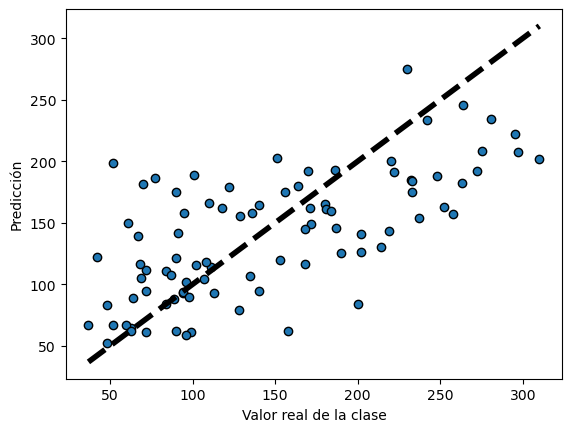

In [15]:
grafica_real_vs_pred(y_test, y_pred, metricas, model)